In [222]:
## Library

In [1]:
#Regex
import re

# Pandas
import pandas as pd

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# Plot AUC *(Self Defined Package)
from metrics.roc_auc import roc_auc

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

# Methods to check for numeric or categorical data in a dataframe
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Resampling
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
## Load data

In [3]:
# set display columns
pd.set_option('display.max_columns', 30)

In [4]:
# Load data
df = pd.read_csv('Final_NHANES.csv', dtype = object)
df.head()

,Gender,Age,Race1,Education,MaritalStatus,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,UrineVol1,UrineFlow1,Diabetes,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,SleepHrsNight,SleepTrouble,PhysActive,Smoke100,mortstat
0,male,34,Race1_White,High School,Married,30000,1.36,6,HomeOwn_Own,NotWorking,87.4,164.7,32.22,70,113,85,1.29,3.49,352,1.70177641463576,Diabetes_No,Good,0,15,4,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,Assumed Alive
1,male,34,Race1_White,High School,Married,30000,1.36,6,HomeOwn_Own,NotWorking,87.4,164.7,32.22,70,113,85,1.29,3.49,352,1.70177641463576,Diabetes_No,Good,0,15,4,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,Assumed Alive
2,male,34,Race1_White,High School,Married,30000,1.36,6,HomeOwn_Own,NotWorking,87.4,164.7,32.22,70,113,85,1.29,3.49,352,1.70177641463577,Diabetes_No,Good,0,15,4,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes,Assumed Alive
3,male,4,Race1_Other,College Grad,NeverMarried,22500,1.07,9,HomeOwn_Own,Working,17,105.4,15.3,80.0220712607703,91.2545853882348,46.9545555712316,1.53267714773803,3.88208994475633,66.0873695894688,0.368071452274304,Diabetes_No,Vgood,-4.46370118102249,0.214065552999656,7.92682772675902,SleepTrouble_No,PhysActive_Yes,Smoke100_No,Assumed Alive
4,female,38.8278664981953,Race1_White,Some College,Married,55898.8804917914,2.76980545663685,6.22044208368844,HomeOwn_Own,Working,73.51088013596,162.722533838437,26.9934977659353,74.0066249744289,116.79929651676,66.3343161416413,1.37485953520915,4.84288294006754,115.410467462256,0.942683356965551,Diabetes_No,Good,2.81723290195866,4.0134527777556,7.00328157874799,SleepTrouble_No,PhysActive_Yes,Smoke100_No,Assumed Alive


In [5]:
df2 = df.drop(['Age','Height','HomeRooms'], axis=1)

In [6]:
# df info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23514 entries, 0 to 23513
Data columns (total 26 columns):
Gender             23514 non-null object
Race1              23514 non-null object
Education          23514 non-null object
MaritalStatus      23514 non-null object
HHIncomeMid        23514 non-null object
Poverty            23514 non-null object
HomeOwn            23514 non-null object
Work               23514 non-null object
Weight             23514 non-null object
BMI                23514 non-null object
Pulse              23514 non-null object
BPSysAve           23514 non-null object
BPDiaAve           23514 non-null object
DirectChol         23514 non-null object
TotChol            23514 non-null object
UrineVol1          23514 non-null object
UrineFlow1         23514 non-null object
Diabetes           23514 non-null object
HealthGen          23514 non-null object
DaysPhysHlthBad    23514 non-null object
DaysMentHlthBad    23514 non-null object
SleepHrsNight      23514 non-n

In [7]:
# numerical columns
num_cols = ['HHIncomeMid', 'Poverty', 'Weight', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'DaysPhysHlthBad', 'DaysMentHlthBad', 'SleepHrsNight']

In [8]:
# categorical columns
cate_cols = df2.columns.drop('mortstat').drop(num_cols)
# display categorical columns
cate_cols

Index(['Gender', 'Race1', 'Education', 'MaritalStatus', 'HomeOwn', 'Work',
       'Diabetes', 'HealthGen', 'SleepTrouble', 'PhysActive', 'Smoke100'],
      dtype='object')

In [9]:
# convert numerical data 
df2[num_cols] = df2[num_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
# df info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23514 entries, 0 to 23513
Data columns (total 26 columns):
Gender             23514 non-null object
Race1              23514 non-null object
Education          23514 non-null object
MaritalStatus      23514 non-null object
HHIncomeMid        23514 non-null float64
Poverty            23514 non-null float64
HomeOwn            23514 non-null object
Work               23514 non-null object
Weight             23514 non-null float64
BMI                23514 non-null float64
Pulse              23514 non-null float64
BPSysAve           23514 non-null float64
BPDiaAve           23514 non-null float64
DirectChol         23514 non-null float64
TotChol            23514 non-null float64
UrineVol1          23514 non-null float64
UrineFlow1         23514 non-null float64
Diabetes           23514 non-null object
HealthGen          23514 non-null object
DaysPhysHlthBad    23514 non-null float64
DaysMentHlthBad    23514 non-null float64
SleepHrsNight    

In [11]:
# categorical columns
cate_cols = df2.columns.drop('mortstat').drop(num_cols)
# display categorical columns
cate_cols

Index(['Gender', 'Race1', 'Education', 'MaritalStatus', 'HomeOwn', 'Work',
       'Diabetes', 'HealthGen', 'SleepTrouble', 'PhysActive', 'Smoke100'],
      dtype='object')

In [12]:
# check the number of unique values
df2[cate_cols].apply(lambda x: x.nunique(), axis=0)

Gender           2
Race1            5
Education        5
MaritalStatus    6
HomeOwn          3
Work             3
Diabetes         2
HealthGen        5
SleepTrouble     2
PhysActive       2
Smoke100         2
dtype: int64

In [13]:
df2['mortstat'].head(15)

0     Assumed Alive
1     Assumed Alive
2     Assumed Alive
3     Assumed Alive
4     Assumed Alive
5     Assumed Alive
6     Assumed Alive
7     Assumed Alive
8     Assumed Alive
9     Assumed Alive
10    Assumed Alive
11    Assumed Alive
12    Assumed Alive
13     Assumed Dead
14    Assumed Alive
Name: mortstat, dtype: object

In [14]:
# convert categorical target to numerical
df2['mortstat'] = df2['mortstat'].apply(lambda x: 1 if x=='Assumed Alive' else 0)

# show the head of df['class']
df2['mortstat'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: mortstat, dtype: int64

In [15]:
# X and y
X = df2.drop(columns=['mortstat'])
y = df2['mortstat']

In [16]:
# X head
X.head(10)

,Gender,Race1,Education,MaritalStatus,HHIncomeMid,Poverty,HomeOwn,Work,Weight,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,UrineVol1,UrineFlow1,Diabetes,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,SleepHrsNight,SleepTrouble,PhysActive,Smoke100
0,male,Race1_White,High School,Married,30000.000000,1.360000,HomeOwn_Own,NotWorking,87.40000,32.220000,70.000000,113.000000,85.000000,1.290000,3.490000,352.000000,1.701776,Diabetes_No,Good,0.000000,15.000000,4.000000,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes
1,male,Race1_White,High School,Married,30000.000000,1.360000,HomeOwn_Own,NotWorking,87.40000,32.220000,70.000000,113.000000,85.000000,1.290000,3.490000,352.000000,1.701776,Diabetes_No,Good,0.000000,15.000000,4.000000,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes
2,male,Race1_White,High School,Married,30000.000000,1.360000,HomeOwn_Own,NotWorking,87.40000,32.220000,70.000000,113.000000,85.000000,1.290000,3.490000,352.000000,1.701776,Diabetes_No,Good,0.000000,15.000000,4.000000,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes
3,male,Race1_Other,College Grad,NeverMarried,22500.000000,1.070000,HomeOwn_Own,Working,17.00000,15.300000,80.022071,91.254585,46.954556,1.532677,3.882090,66.087370,0.368071,Diabetes_No,Vgood,-4.463701,0.214066,7.926828,SleepTrouble_No,PhysActive_Yes,Smoke100_No
4,female,Race1_White,Some College,Married,55898.880492,2.769805,HomeOwn_Own,Working,73.51088,26.993498,74.006625,116.799297,66.334316,1.374860,4.842883,115.410467,0.942683,Diabetes_No,Good,2.817233,4.013453,7.003282,SleepTrouble_No,PhysActive_Yes,Smoke100_No
5,female,Race1_White,Some College,Married,55898.880492,2.769805,HomeOwn_Own,Working,73.51088,26.993498,74.006625,116.799297,66.334316,1.374860,4.842883,115.410467,0.942683,Diabetes_No,Good,2.817233,4.013453,7.003282,SleepTrouble_No,PhysActive_Yes,Smoke100_No
6,female,Race1_White,Some College,Married,55953.140034,2.769942,HomeOwn_Own,Working,73.22918,26.929815,74.047903,116.633453,66.233104,1.375526,4.836901,115.247933,0.940397,Diabetes_No,Good,2.777652,4.003761,7.006145,SleepTrouble_No,PhysActive_Yes,Smoke100_No
7,female,Race1_White,Some College,Married,55953.140034,2.769942,HomeOwn_Own,Working,73.22918,26.929815,74.047903,116.633453,66.233104,1.375526,4.836901,115.247933,0.940397,Diabetes_No,Good,2.777652,4.003761,7.006145,SleepTrouble_No,PhysActive_Yes,Smoke100_No
8,female,Race1_White,Some College,LivePartner,40000.000000,1.910000,HomeOwn_Rent,NotWorking,86.70000,30.570000,86.000000,112.000000,75.000000,1.160000,6.700000,77.000000,0.094000,Diabetes_No,Good,0.000000,10.000000,8.000000,SleepTrouble_Yes,PhysActive_No,Smoke100_Yes
9,female,Race1_White,Some College,Married,55898.880492,2.769805,HomeOwn_Own,Working,73.51088,26.993498,74.006625,116.799297,66.334316,1.374860,4.842883,115.410467,0.942683,Diabetes_No,Good,2.817233,4.013453,7.003282,SleepTrouble_No,PhysActive_Yes,Smoke100_No


In [17]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

# X head
X.head()

,HHIncomeMid,Poverty,Weight,BMI,Pulse,BPSysAve,BPDiaAve,DirectChol,TotChol,UrineVol1,UrineFlow1,DaysPhysHlthBad,DaysMentHlthBad,SleepHrsNight,Gender_male,...,MaritalStatus_NeverMarried,MaritalStatus_Separated,MaritalStatus_Widowed,HomeOwn_HomeOwn_Own,HomeOwn_HomeOwn_Rent,Work_NotWorking,Work_Working,Diabetes_Diabetes_Yes,HealthGen_Fair,HealthGen_Good,HealthGen_Poor,HealthGen_Vgood,SleepTrouble_SleepTrouble_Yes,PhysActive_PhysActive_Yes,Smoke100_Smoke100_Yes
0,30000.000000,1.360000,87.40000,32.220000,70.000000,113.000000,85.000000,1.290000,3.490000,352.000000,1.701776,0.000000,15.000000,4.000000,1,...,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1
1,30000.000000,1.360000,87.40000,32.220000,70.000000,113.000000,85.000000,1.290000,3.490000,352.000000,1.701776,0.000000,15.000000,4.000000,1,...,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1
2,30000.000000,1.360000,87.40000,32.220000,70.000000,113.000000,85.000000,1.290000,3.490000,352.000000,1.701776,0.000000,15.000000,4.000000,1,...,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1
3,22500.000000,1.070000,17.00000,15.300000,80.022071,91.254585,46.954556,1.532677,3.882090,66.087370,0.368071,-4.463701,0.214066,7.926828,1,...,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,55898.880492,2.769805,73.51088,26.993498,74.006625,116.799297,66.334316,1.374860,4.842883,115.410467,0.942683,2.817233,4.013453,7.003282,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [18]:
X.shape

(23514, 40)

In [19]:
X = X[X.columns.drop(list(X.filter(regex='Age_')))]
X = X[X.columns.drop(list(X.filter(regex='Height_')))]

In [20]:
# X shape
X.shape

(23514, 40)

In [21]:
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [22]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [23]:
# SMOTE
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 22634, 0: 880})


In [24]:
sm = SMOTE(random_state=42)

In [27]:
X_res, y_res = sm.fit_sample(X, y)

In [28]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 22634, 0: 22634})


In [29]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X_res, y_res, scoring='roc_auc', cv=3)

In [30]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9981318496070476


In [31]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, 
                                                    random_state=21, stratify=y_res)

In [32]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
# predict on the test set
y_pred_prob = xgb_cl.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [34]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [35]:
# AUC score
ROC.auc()

0.9983399366180096

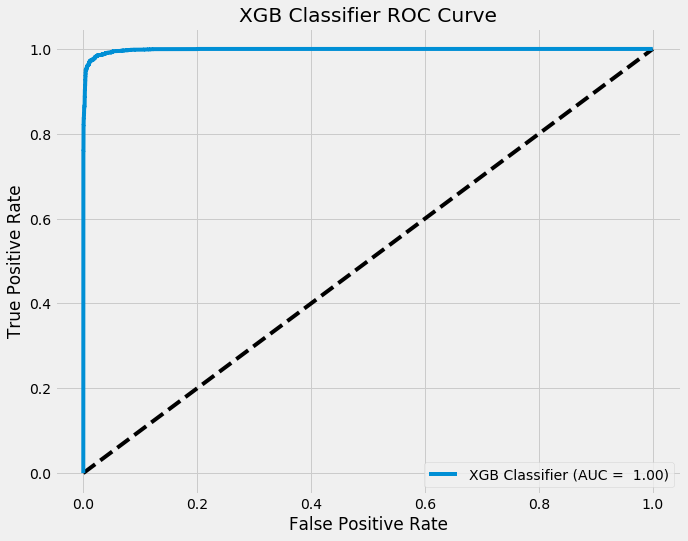

In [36]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

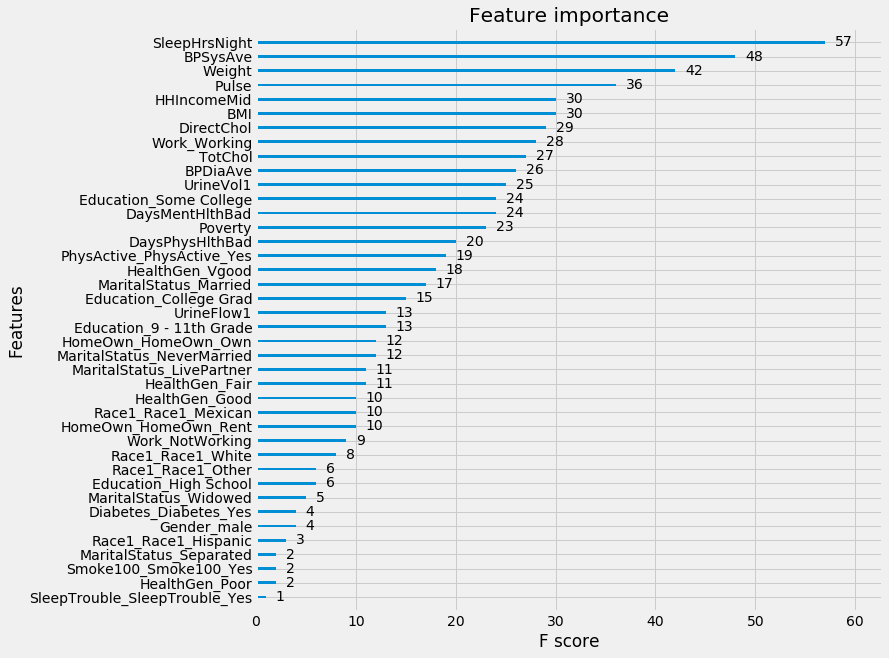

In [37]:
# set figsize
figsize(10,10)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)